<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnit_10_Time_series_fundamentals_in_TensorFlow/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

## Get data

We´re going to be using the historical price data of Bitcoin to try to predict the future price of Bitcoin.

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-08-25 16:42:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-08-25 16:42:24 (7.51 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd
# Read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) #Parse the date column and tell pandas column 1 is a datetime

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df)

2787

In [6]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
#Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


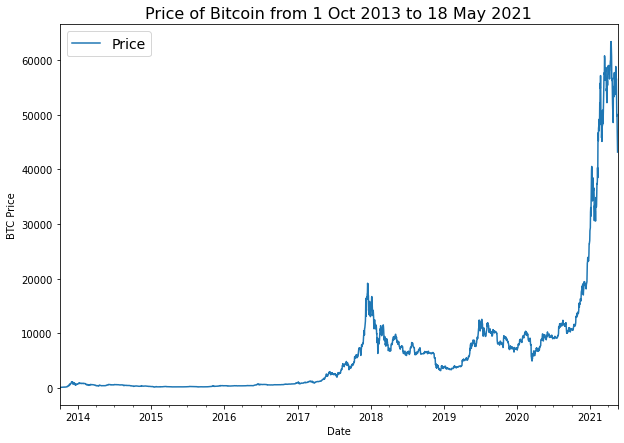

In [8]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Import time series data with Python´s CSV module

In [9]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #Skip first line (gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #get the dates as dates (not as string)
    btc_price.append(float(line[2]))

#View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

No handles with labels found to put in legend.


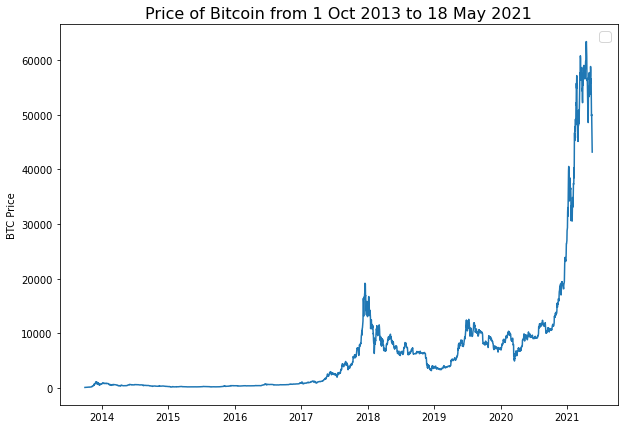

In [10]:
#Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with tume series data

In [11]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

### Create train & test sets for time series

In [12]:
# Create train and test splits for time series data
split_size = int(0.8*len(prices)) #80% train, 20% test

#Create train data splits (everything before the split)
x_train, y_train = timesteps[:split_size], prices[:split_size]

#Create test data splits (everything beyond the split)
x_test, y_test = timesteps[split_size:], prices[split_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(2229, 2229, 558, 558)

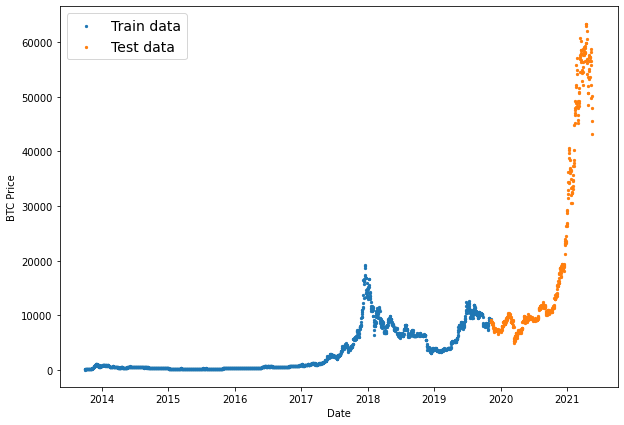

In [13]:
# plot train and test set
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=5, label="Train data")
plt.scatter(x_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timestimps)
  Parameters:
    timestamps: array of timestep values
    values: array of values across time
    format: style of plot, default "."
    start: where to start the plot (setting a value will index from start of timesteps)
    end: where to end the plot (similar to start but for the end)
    label: label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) #make label bigger
  plt.grid(True)

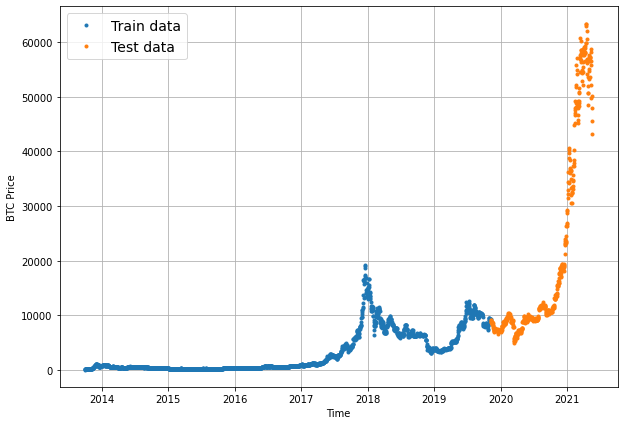

In [15]:
#Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")

## Modelling Experiments



In [16]:
naive_forecast = y_test[:-1]

In [17]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

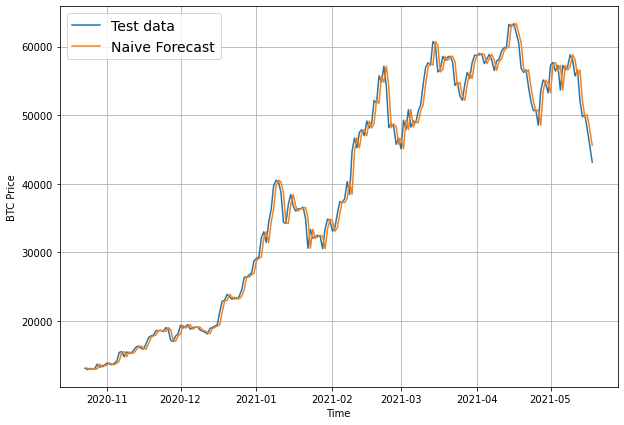

In [18]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

## Evaluating a time series model - Evaluation metrics

We´re predicting a number - so that means we have a form of a regression problem.

Because we´re working on a regression problem, we´ll need some a regression-like metrics.

A few comoon regression metrics (which can also be used for time series forecasting)
* MAE - mean absolute error
* MSE - mean squarred error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we´re evaluating here is: how do our model´s forecast (y_pred) compare against the actual values (y_true or ground truth values)

In [19]:
import tensorflow as tf

# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecat (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) #our seasonality is 1 day (hence the shift is 1)

  return mae / mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred=naive_forecast).numpy()


0.9995699939182624

In [21]:
# Create a function to take in model prediction an truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

In [23]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Other models you can use for baselines and for actual forecasts

In this notebook, we´re focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models.

## Format Data Part 2: Windowing our data

Why do we window?

We window our time series dataset to turn our data in a supervised learning problem.

Windowing for one week
[0, 1, 2, 3, 4, 5] - > [6]
[1, 2, 3, 4, 5, 6] -> [7]
[2, 3, 4, 5, 6, 7] -> [8]

In [24]:
len(y_train)

2229

In [25]:
#What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [26]:
#Let´s setup global variables for window and horizon size
HORIZON = 1 #predict next 1 day
WINDOW_SIZE = 7 #use the past week of bitcoin data to make the prediction

In [27]:
#Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [28]:
#Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We´ve got a wa to label our windowd data. 

This only works on a small scale. 

We need a way to do the above across entire time series.

We could do this with Python foor loops, however, for large time series this is quite slow. To speed things up, we´ll lerverage NumPy´s array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
2. Uses the 2D array of multiple window steps (form 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our 'get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [29]:
import numpy as np
#Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turn a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T #create 2D array of windows of size window_size

  # 3. Index on the target array ( a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 5 Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [30]:
full_windows, full_labels = make_windows(prices)

In [31]:
len(full_windows), len(full_labels)

(2780, 2780)

In [32]:
#View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


##Turning windows into training an test sets

In [33]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  split_size =  int(len(windows) * (1-test_split)) #this will default to 80% train and 20% test split
  train_labels = labels[:split_size]
  test_labels = labels[split_size:]
  train_windows = windows[:split_size]
  test_windows = windows[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [34]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [35]:
train_windows[:5], train_labels[5:]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[ 126.38333   ],
        [ 135.24199   ],
        [ 133.20333   ],
        ...,
        [9335.75240233],
        [9226.48582088],
        [8794.35864452]]))

## Make a modelling checkpoint

Because our model´s performance will fluctuate from experiment to experiment, we´re going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model´s best performances against the other model´s best performances.

For example if our model performs the best on epoch 55 (but we´re training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [36]:
import os

#Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, #only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units ans Relu
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we´ve used 32)
* 100 epochs

* Hyperparameters = values a machine learning practitioner can adjust themselves
* Parameters = values a model learns on its own

In [37]:
import tensorflow as tf
from tensorflow.keras import layers

#Set random seed
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear") #linear = no activation
], name="model_1_dense")

In [38]:
#Compile the model
model_1.compile(loss="mae",
                optimizer="Adam",
                metrics=["mae", "mse"])

In [39]:
#Fit the model 
model_1.fit(train_windows, train_labels,
            epochs=100, verbose=1,
            batch_size=128, validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 15ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
INFO:tensorflow:Assets written to: model_ex

In [40]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [41]:
# Load in the saved best perfoming model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won´t be actual forecasts, they´re only pseudo forecasts because actual forecasts are into the future), let´s write a function to:

1. Take in a train model 
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model predict() method
4. Return the predictions

In [42]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) #return 1D array of predictions

In [43]:
# Make predictions using model_1 on the test dataset 
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [45]:
# Evaluate preds
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4712}

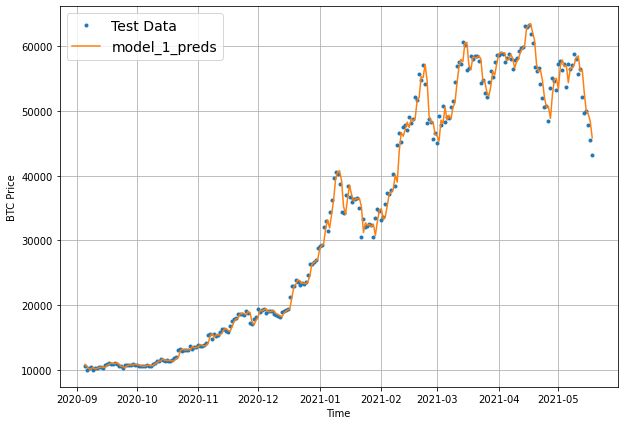

In [48]:
# Let´s plot our model 1 predictions
offset = 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plottting
plot_time_series(x_test[-len(test_windows):], test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(x_test[-len(test_windows):], model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window=30, horizon=1)

In [56]:
HORIZON = 1 #predict one time step at a time
WINDOW_SIZE = 30 #use 30 timesteps in the pas

In [57]:
# Make windowed data with appropriate horizon and window size
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [58]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split=0.2)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

In [59]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [60]:
train_labels[:3]

array([[196.02499],
       [198.04883],
       [198.93233]])

In [61]:
#Set random seed
tf.random.set_seed(42)

#Build the model 
model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_2_dense")

In [62]:
#Compile the model 
model_2.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [63]:
#Fit the model 
model_2.fit(train_windows, train_labels,
            epochs=100, batch_size=128, 
            validation_data=(test_windows, test_labels),
            verbose=0, 
            callbacks=[create_model_checkpoint(model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [64]:
#Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [66]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [67]:
#Get forecast predictions
model_2_preds = make_preds(model_2, test_windows)

In [70]:
print(test_labels.shape)
print(tf.squeeze(test_labels).shape)
print(model_2_preds.shape)

(552, 1)
(552,)
(552,)


In [68]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693388,
 'mase': 1.0644706,
 'mse': 1281438.9,
 'rmse': 1132.0066}

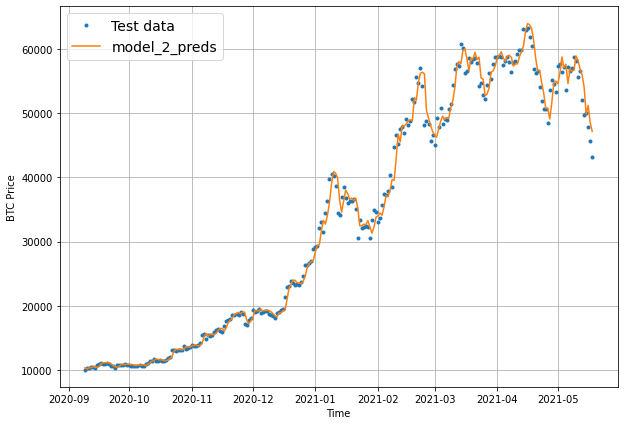

In [73]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):], test_labels[:, 0], start=offset, label="Test data")
plot_time_series(x_test[-len(test_windows):], model_2_preds, start=offset,format="-", label="model_2_preds")